# Problem 4.1

### Shape Alignment Algorithm Flowchart

I will be using PCA for alignment.
1. Load Data
   - Load dataset of shapes.

2. Alignment Algorithm (PCA)
   - Align remaining shapes with the template shape.
      - center the shape
      - calculate covariance matrix
      - obtain eionvectors and eigenvalues
      - sort eigenvectors by eigenvalues
      - select the first `k` eigenvectors

3. Evaluate the alignment
   - Calculate the mean square error (MSE) between the aligned shapes and the template shape.

6. Visualization
   - Visualize aligned shapes and save results.

7. Iterate (if needed)
   - Fine-tune algorithm or preprocessing steps based on evaluation results.

8. End
   - Finish the alignment task.


In [318]:
import numpy as np
import math
from sklearn.decomposition import PCA
from skimage.transform import resize  # Import the resize function from scikit-image
from PIL import Image
import os
import matplotlib.pyplot as plt

### Preprocess data to load the png images as numpy arrays

In [319]:
# Define the directory where your PNG images are stored (ChatGPT)
image_dir = "KIMIA dataset"

# Get a list of all files (images) in the directory
image_files = [f for f in os.listdir(image_dir) if f.endswith(".png")]

# Initialize an empty list to store the image data as NumPy arrays
image_data = []

# Loop through the image files, load each image, and convert it to a NumPy array
for image_file in image_files:
    # Construct the full path to the image file
    image_path = os.path.join(image_dir, image_file)
    
    # Open the image using Pillow
    image = Image.open(image_path)
    
    # Convert the image to a NumPy array
    image_array = np.array(image)
    
    # Append the image array to the list
    image_data.append(image_array)

# Now, 'image_data' is a list containing NumPy arrays of your 99 images

In [320]:
# Analyse the attributes of the dataset
# print shape of each image
print(image_data[1])

# print the number of unique values each pixel can take (to make sure we have binary masks)
print(np.unique(image_data[0]))


[[255 255 255 ... 255 255 255]
 [255 255 255 ... 255 255 255]
 [255 255 255 ... 255 255 255]
 ...
 [255 255 255 ... 255 255 255]
 [255 255 255 ... 255 255 255]
 [255 255 255 ... 255 255 255]]
[  0 127 255]


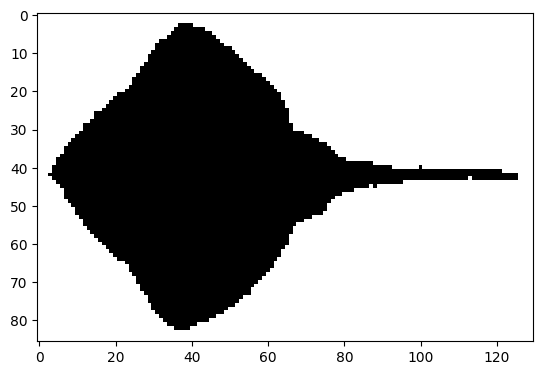

In [321]:
# choose a random template image
random_index = np.random.randint(0, len(image_data))
template_image = image_data[random_index]

# display the template image
plt.imshow(template_image, cmap='gray')
plt.show()

In [322]:
# perform PCA on the template image to get principal components

# Define the target size for all masks
target_size = (256, 256)  # Choose the desired size

# Resize each mask to the target size and flatten them
resized_masks = [resize(mask, target_size, anti_aliasing=True) for mask in image_data]

# Stack the resized masks into a single matrix of shape (99, 256 , 256)
resized_masks = np.stack(resized_masks)

print(resized_masks.shape)

# Specify the number of components you want to keep after PCA
num_components = 2

# Create a PCA instance
pca = PCA(n_components=num_components)

(99, 256, 256)


In [323]:
# # iteratively get the principal components of the other images and calculate the angle between them and the template image
# angles = []
# for i in range(len(image_data)):
#     # Get the principal components of the current image
#     pca.fit(resized_masks[i])

#     other_image_pcs = pca.components_

#     # Get the principal components of the template image
#     pca.fit(resized_masks[random_index])

#     template_image_pcs = pca.components_

#     # Calculate the angle between the principal components of the current image and the template image
#     angle = np.arccos(np.abs(np.dot(other_image_pcs.flatten(),template_image_pcs.flatten())))

#     # Append the angle to the list
#     angles.append(angle)
# Initialize a list to store the angles
angles = []

# Get the principal components of the template image
pca.fit(resized_masks[random_index])
template_image_pcs = pca.components_

# Calculate the explained variance ratios of the template image's principal components
explained_variances = pca.explained_variance_ratio_[:num_components]

# Loop through the other images
for i in range(len(image_data)):
    # Get the principal components of the current image
    pca.fit(resized_masks[i])
    other_image_pcs = pca.components_

    # Calculate the angles between the principal components of the current image and the template image
    # Calculate the angle for each of the top num_components components
    component_angles = []
    for j in range(num_components):
        dot_product = np.dot(other_image_pcs[j], template_image_pcs[j])
        # Ensure the dot product is within the valid range [-1, 1]
        dot_product = np.clip(dot_product, -1.0, 1.0)

        angle = np.arccos(dot_product)
        component_angles.append(angle)

    # Calculate the linear combination of angles in proportion to their explained variance ratios
    linear_combination = np.dot(component_angles, explained_variances)

    # Append the linear combination of angles to the list
    angles.append(linear_combination)

In [324]:
print(angles)
print(angles[random_index])
# find the largest and smallest angles
max_angle = np.max(angles)
min_angle = np.min(angles)

print("max_angle: ", max_angle)
print("min_angle: ", min_angle)


[0.8894478396499216, 0.5682450593468747, 1.5513063098124902, 0.6308853308176435, 0.1884264686207308, 8.30413507763382e-09, 0.9169061945765196, 0.7301341926853582, 0.7370078211364548, 1.5326199385472055, 0.12469403908170552, 0.8214142874118338, 0.7161527795780156, 0.8234273866163069, 0.5315238491733681, 0.6322260247914553, 0.13732916788503496, 0.5536922637473733, 0.6676729235732419, 0.6297569283285507, 0.7068459716868072, 0.602033569115987, 0.08560269847207985, 1.526167907787931, 1.576098383603688, 0.919130855620055, 0.7801742065101303, 1.5428910669629994, 0.777219457933283, 0.9540530776878521, 0.8100307316072781, 0.6124091305454087, 0.8209037439861262, 1.5875507078115199, 0.7294291630792905, 1.5697241473859873, 0.8039386990876174, 1.6180632924335097, 1.5626982789807426, 1.1514640121411177, 0.6562663153899505, 1.5256037707533572, 0.9371174683165392, 1.5132007480484904, 0.306885369685022, 0.8506897939695075, 1.558523646080512, 0.7442649390928564, 1.5734259922797798, 1.5286007067187326, 0

0.8894478396499216


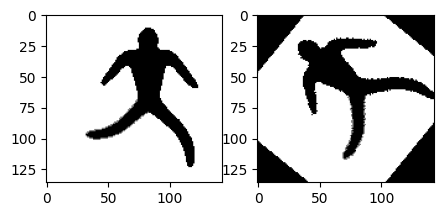

In [325]:
# rotate all the images by their corresponding angles in the list
rotated_images = []
for i in range(len(image_data)):
    # convert numpy image to PIL image and Rotate the image by the angle
    rotated_image = Image.fromarray(image_data[i]).rotate(math.degrees(angles[i])) # Use the rotate function from Pillow

    # Convert the rotated image back to a NumPy array
    rotated_image = np.array(rotated_image)
    
    # Append the rotated image to the list
    rotated_images.append(rotated_image)
    # print(rotated_image.shape)
    if(i == 0):
        print(angles[i])
        plt.figure(figsize=(5, 5))
        plt.subplot(1, 2, 1)
        plt.imshow(image_data[i], cmap='gray')
        plt.subplot(1, 2, 2)
        plt.imshow(rotated_image, cmap='gray')
        plt.show()

### Before PCA Alignment

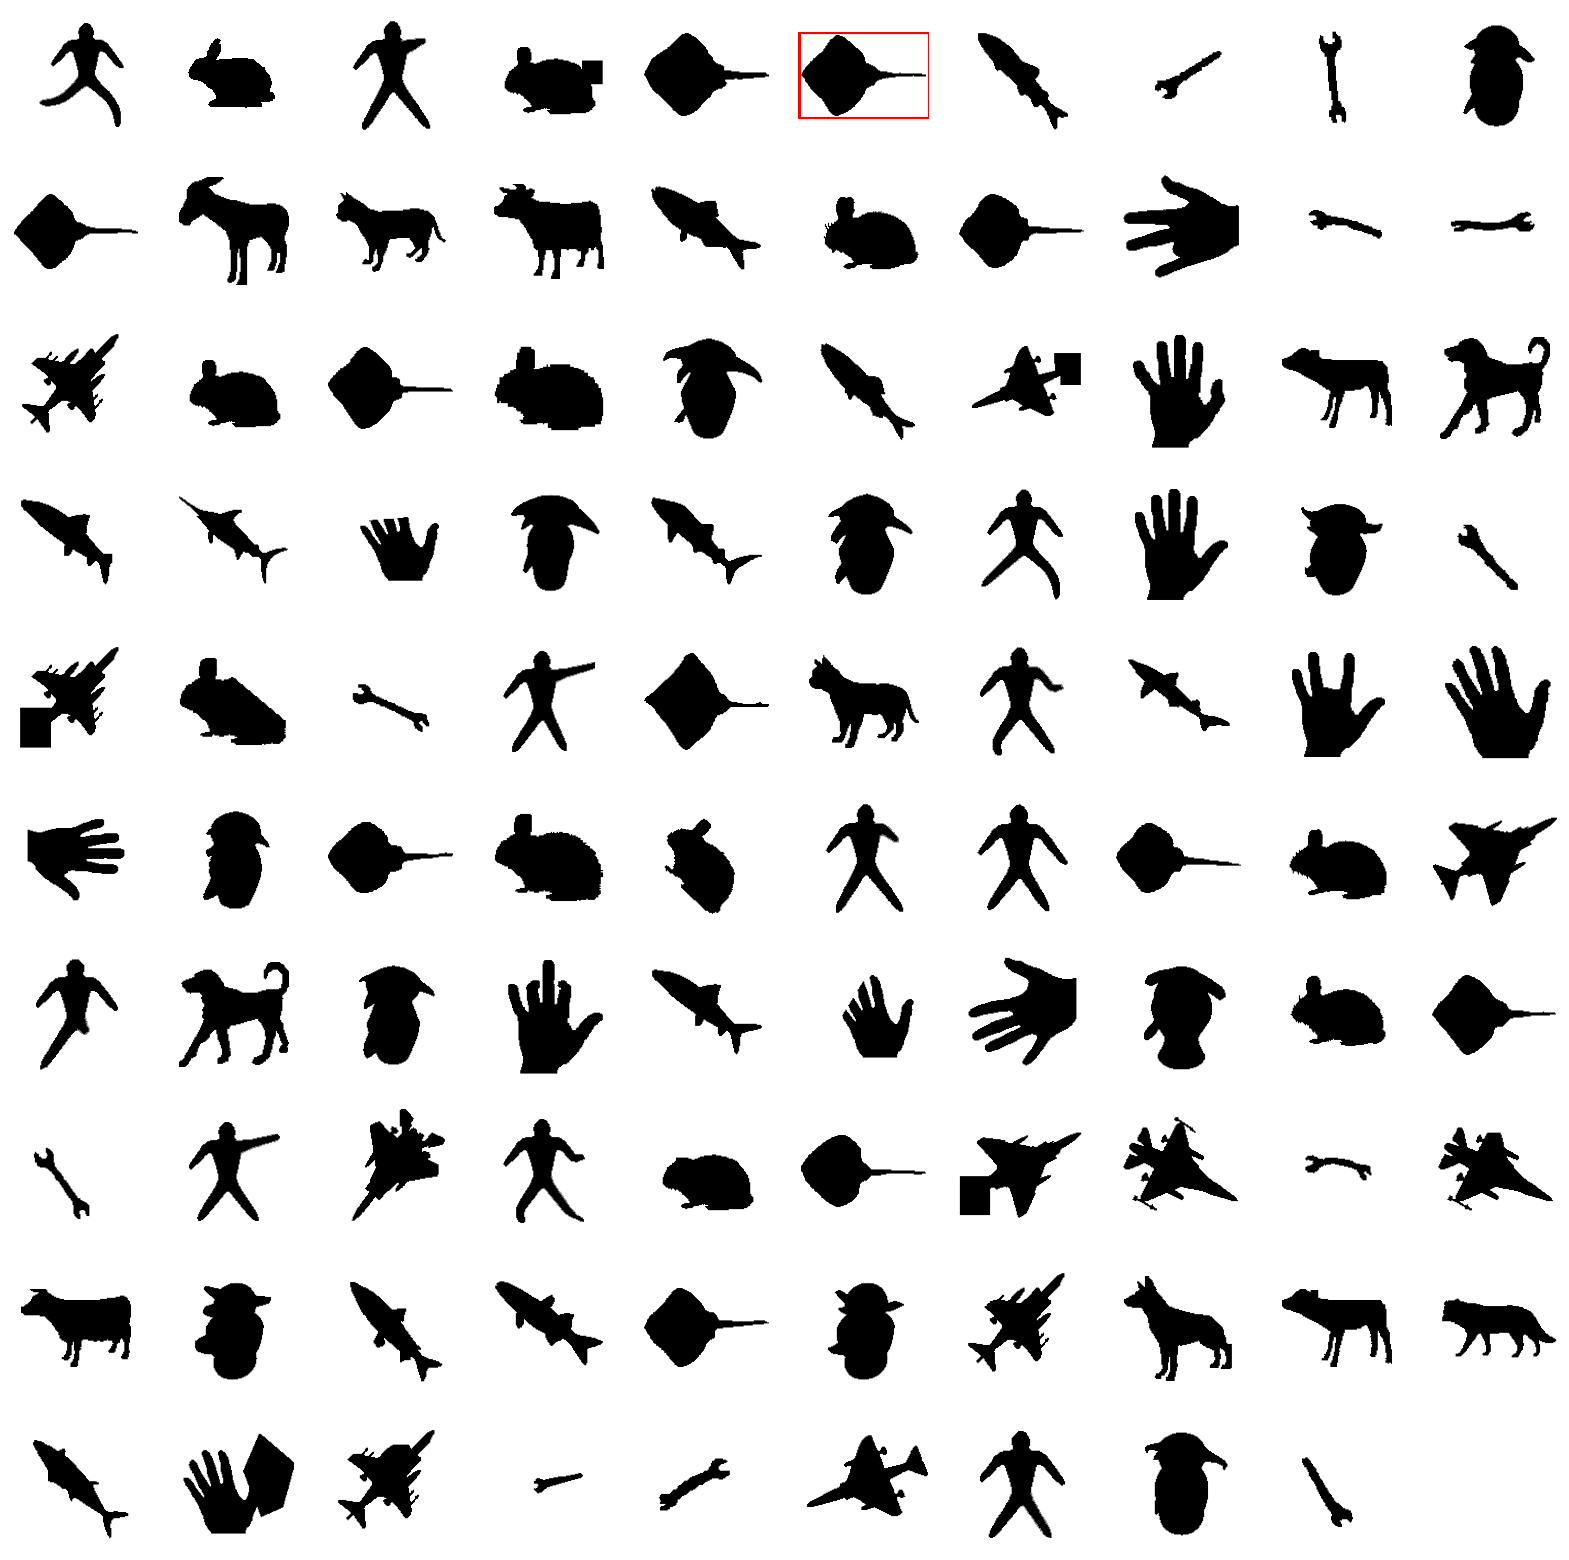

In [326]:
# Create a figure with a 10x10 grid
fig, axs = plt.subplots(10, 10, figsize=(20, 20))

# Flatten the grid of axes objects for easier indexing
axs = axs.ravel()

# Loop through the aligned images and plot them on subplots
for i in range(len(image_data)):
    axs[i].imshow(image_data[i], cmap='gray')
    axs[i].axis('off')  # Turn off axis labels and ticks

    # Add a red box around the template image
    if i == random_index:
        axs[i].add_patch(plt.Rectangle((0, 0), image_data[i].shape[1], image_data[i].shape[0],
                                      edgecolor='red', linewidth=3, fill=False))
    
# Hide any remaining empty subplots
for i in range(len(image_data), 10*10):
    axs[i].axis('off')

plt.show()

### After PCA Alignment

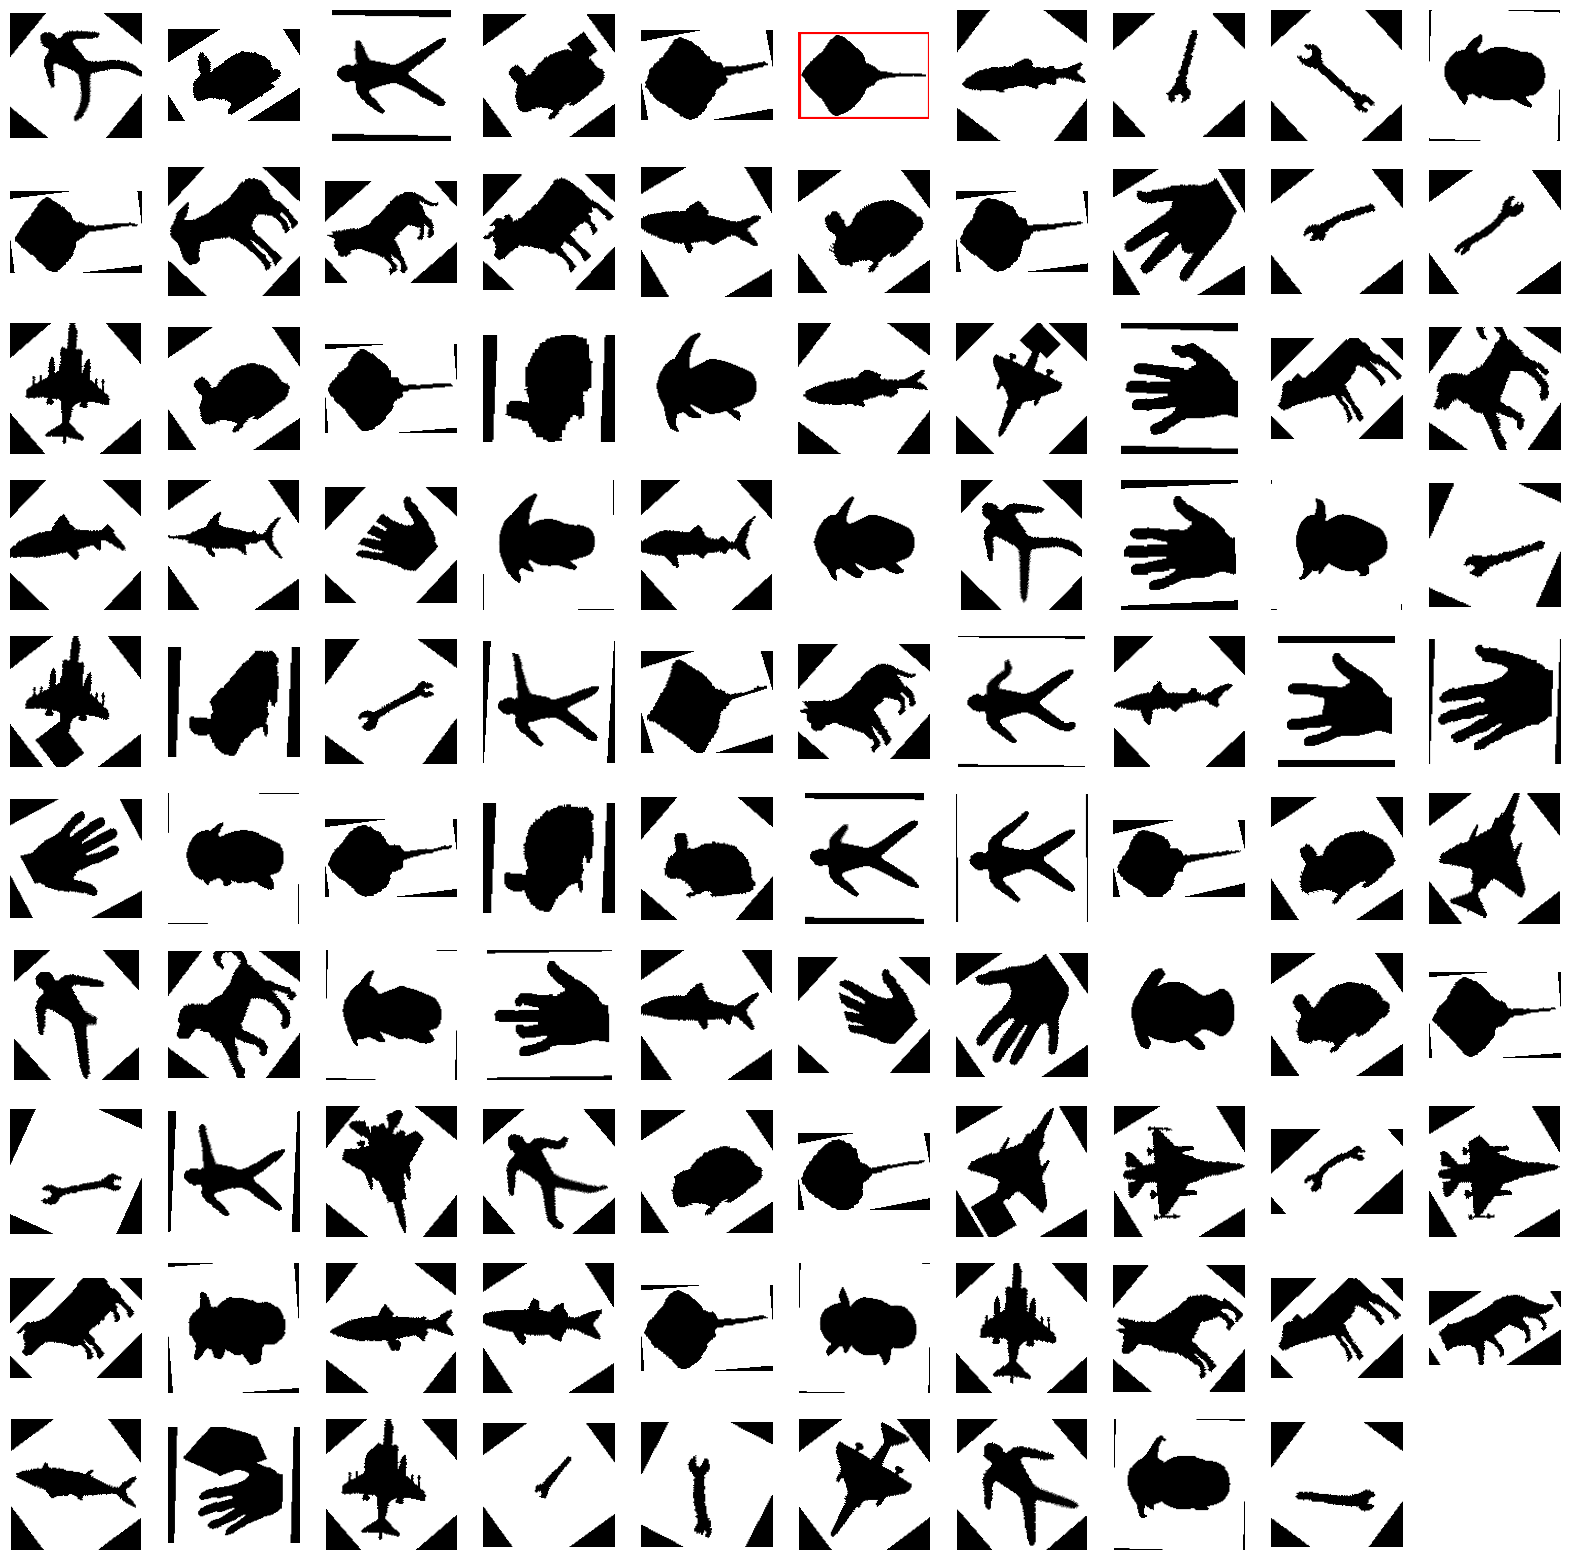

In [327]:
# Create a figure with a 10x10 grid
fig, axs = plt.subplots(10, 10, figsize=(20, 20))

# Flatten the grid of axes objects for easier indexing
axs = axs.ravel()

# Loop through the aligned images and plot them on subplots
for i in range(len(rotated_images)):
    axs[i].imshow(rotated_images[i], cmap='gray')
    axs[i].axis('off')  # Turn off axis labels and ticks

    # Add a red box around the template image
    if i == random_index:
        axs[i].add_patch(plt.Rectangle((0, 0), rotated_images[i].shape[1], rotated_images[i].shape[0],
                                      edgecolor='red', linewidth=3, fill=False))
    
# Hide any remaining empty subplots
for i in range(len(rotated_images), 10*10):
    axs[i].axis('off')

plt.show()